In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Load data
import pandas as pd
data = pd.read_csv("data.csv",header = 0)
data.head()


IOError: File data.csv does not exist

In [3]:
#Clean up data
data = data.drop('id', 1)
data = data.drop("Unnamed: 32",1)
#In diagnosis, map M to 1 (positive) and B to 0 (negative)
data['diagnosis'] = data['diagnosis'].map({'M' : 1, 'B' : 0})
data.head()

NameError: name 'data' is not defined

In [13]:
#Organizing data in numpy arrays
np.set_printoptions(suppress=True) #Scientific notation is annoying...
split_index = int(data.shape[0]*0.8) #Splitting test (20%) and train(80%) at this index
np_data = np.array(data, dtype=float)
#Features
x = np_data[:,1:31]
x_train = x[0:split_index,:]
x_test = x[split_index:,:]
#Target values
y = np_data[:,0]
y_train = y[:split_index]
y_test = y[split_index:]

In [54]:
#Attempting k-NN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(x_train, y_train)
#Evaluation
print neigh.score(x_test,y_test)
print recall_score(y_test, neigh.predict(x_test))
print precision_score(y_test, neigh.predict(x_test))
confusion_knn = confusion_matrix(neigh.predict(x_test), y_test)
print confusion_knn


0.947368421053
0.884615384615
0.884615384615
[[85  3]
 [ 3 23]]


In [53]:
#Attempting logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
lr = LogisticRegression()
lr.fit(x_train,y_train)
#Evaluation
print lr.score(x_test,y_test)
print recall_score(y_test, lr.predict(x_test))
print precision_score(y_test, lr.predict(x_test))
confusion_lr = confusion_matrix(lr.predict(x_test), y_test)
print confusion_lr

0.929824561404
0.961538461538
0.78125
[[81  1]
 [ 7 25]]


In [52]:
# #NEURAL NETS not available in this version of sklearn, gotta install...
# #http://stackoverflow.com/questions/34016238/sklearn-import-mlpclassifier-fails
# #Attempting Neural Networks
# #Sensitive to feature scaling...
# from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(x_train)
# scaled_x_train = scaler.transform(x_train)
# scaled_x_test = scaler.transform(x_test)

# #"Empirically, we observed that L-BFGS converges faster and with better solutions on small datasets." - sklearn
# net = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_later_sizes=(5,2), random_state=1)
# net.fit(x_train, y_train)



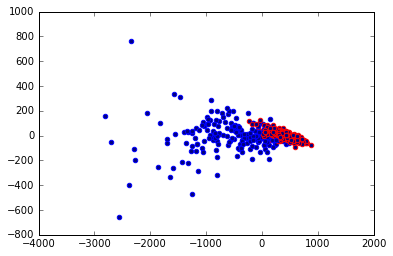

In [50]:
#Graph???
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.transform(x_train)
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c=0, color='red')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c=1, color='blue')
pl.show()